In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from sklearn.metrics import r2_score,mean_squared_error
import warnings
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()

In [7]:
raw_csv_data = pd.read_csv('1.05 STATION HIRONPOINT.csv')
raw_csv_data.head()
df_comp =raw_csv_data.copy()

In [8]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date",inplace=True)
df_comp

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
Date,,,,,,,,,,,
2017-01-01,101.52,14.48,25.83,0.00,3.45,68.81,15.99,12.643,5.516,2.80,0.73
2017-02-01,101.51,14.08,26.18,0.00,4.23,68.69,15.46,12.644,5.387,2.68,0.82
2017-03-01,101.44,15.01,26.30,0.08,4.81,73.44,15.34,12.713,5.232,2.66,0.80
2017-04-01,101.34,14.66,26.21,0.04,4.66,72.94,15.57,12.954,5.149,2.56,0.83
2017-05-01,101.32,13.23,25.94,0.02,4.98,69.50,14.65,12.956,5.065,2.50,0.86
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,101.36,10.70,23.17,0.00,4.29,68.44,12.18,12.579,7.441,3.09,0.63
2020-12-28,101.31,10.18,23.54,0.00,3.74,61.88,12.98,12.582,7.208,2.76,0.63
2020-12-29,101.35,11.07,23.82,0.00,4.02,64.56,13.09,12.608,7.121,3.09,0.70


In [9]:
df_comp = df_comp.asfreq('d') #'d' -> daily

In [10]:
df_comp2 = df_comp.copy()
del df_comp['LOW']

In [11]:
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df2 = df_comp2.iloc[:size]
df2_test = df_comp2.iloc[size:]

In [12]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p


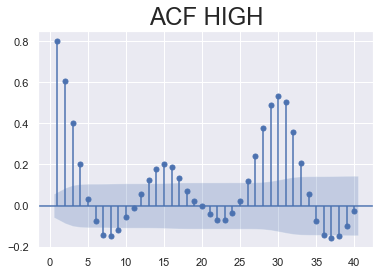

In [13]:
sgt.plot_acf(df.HIGH, lags = 40, zero = False)
plt.title("ACF HIGH", size=24)
plt.show()

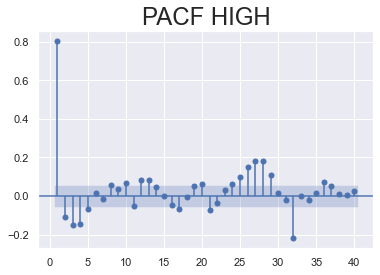

In [14]:
sgt.plot_pacf(df.HIGH, lags=40, zero = False, method=('ols'))
plt.title("PACF HIGH", size=24)
plt.show()

In [15]:
df_test.head()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2020-03-14,101.18,17.92,33.76,0.00,6.71,60.62,22.34,14.855,3.933,2.30
2020-03-15,101.20,17.00,32.57,0.00,4.52,61.56,20.22,14.977,4.029,2.22
2020-03-16,101.26,18.33,32.42,0.00,3.46,64.94,20.45,14.929,4.063,2.33
2020-03-17,101.33,18.85,31.69,0.00,3.86,64.12,21.95,14.893,4.100,2.48
2020-03-18,101.20,17.90,32.47,0.01,4.91,62.06,21.36,14.854,4.198,2.62


In [16]:
df_test.tail()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2020-12-27,101.36,10.70,23.17,0.0,4.29,68.44,12.18,12.579,7.441,3.09
2020-12-28,101.31,10.18,23.54,0.0,3.74,61.88,12.98,12.582,7.208,2.76
2020-12-29,101.35,11.07,23.82,0.0,4.02,64.56,13.09,12.608,7.121,3.09
2020-12-30,101.45,12.75,24.06,0.0,4.53,72.25,13.26,12.622,6.984,3.01
2020-12-31,101.49,12.98,24.23,0.0,4.71,73.56,13.51,12.639,6.725,2.92


In [17]:
start_date = "2020-03-14"
end_date = "2020-12-31"

In [18]:
df_comp.head()

,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH
Date,,,,,,,,,,
2017-01-01,101.52,14.48,25.83,0.00,3.45,68.81,15.99,12.643,5.516,2.80
2017-01-02,101.50,12.86,28.01,0.00,4.31,62.06,15.41,13.861,2.498,2.71
2017-01-03,101.19,12.31,32.66,0.00,5.73,49.25,18.88,14.341,2.080,2.35
2017-01-04,100.83,23.60,31.47,0.31,7.51,78.69,25.56,14.164,3.653,2.68
2017-01-05,100.91,25.26,29.97,10.47,5.58,85.50,26.51,13.140,7.183,2.68


In [25]:
mod_auto2 = auto_arima(df.HIGH,exogenous = df[['SURFACE PRESSURE','TEMPERATURE',
                                               'MAX WIND SPD','N_ICE EXTENT']]
                       ,m = 30, max_p = 12, max_q = 12)

In [26]:
mod_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1168
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 30)   Log Likelihood                 198.796
Date:                              Sat, 26 Mar 2022   AIC                           -379.591
Time:                                      15:36:19   BIC                           -334.024
Sample:                                  01-01-2017   HQIC                          -362.403
                                       - 03-13-2020                                         
Covariance Type:                                opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.2720      0.375      3.388      0.001       0.536       2.008
SURFACE PRESSURE    -0.1557      0.025     -6.282      0.000      -0.204      -0.107
TEMPERATURE         -0.0101      0.003     -3.709      0.000      -0.015      -0.005
MAX WIND SPD        -0.0200      0.005     -3.811      0.000      -0.030      -0.010
N_ICE EXTENT        -0.0409      0.004     -9.569      0.000      -0.049      -0.032
ar.L1                0.6995      0.008     92.513      0.000       0.685       0.714
ar.S.L30             0.7823      0.061     12.859      0.000       0.663       0.902
ma.S.L30            -0.6027      0.073     -8.310      0.000      -0.745      -0.461
sigma2               0.0403      0.001     53.543      0.000       0.039       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              7884.23
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
df_auto_pred_pr2 = pd.DataFrame(mod_auto2.predict(n_periods = len(df_test[start_date:end_date]),exogenous = df_test[['SURFACE PRESSURE','TEMPERATURE',
                                               'MAX WIND SPD','S_ICE EXTENT']][start_date:end_date]),
                               index = df_test[start_date:end_date].index)

<AxesSubplot:xlabel='Date'>

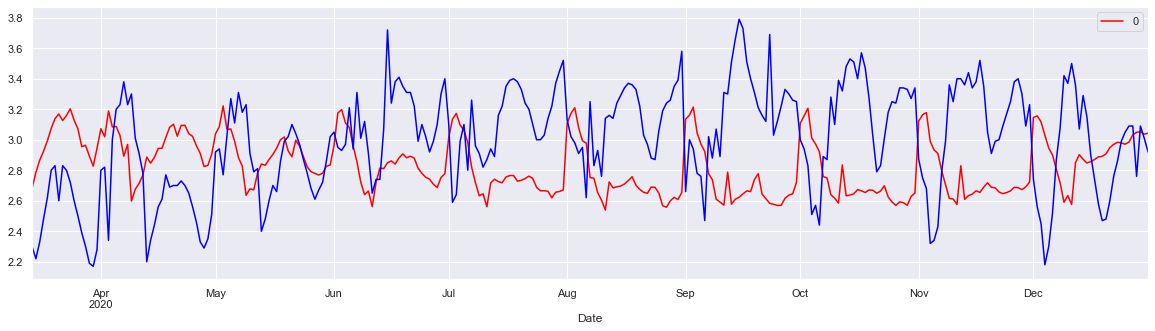

In [28]:
df_auto_pred_pr2[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.HIGH[start_date:end_date].plot(color = "blue")

In [29]:
acc =r2_score(df_test.HIGH[start_date:end_date],df_auto_pred_pr2[start_date:end_date])
print("Testing Score: ",acc)

Testing Score:  -1.0736952515976323
